<a href="https://colab.research.google.com/github/TanChen168/Week7_ClassificationModels/blob/main/KNNExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [35]:
df = pd.read_csv('/content/sample_data/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight' , 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'])
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

# The target we are trying to predict
y = df['Sex']
# The features we will use to make the prediction
X = df.drop(columns = 'Sex')

In [30]:
df.nunique()

Sex                 3
Length            134
Diameter          111
Height             51
WholeWeight      2429
ShuckedWeight    1515
VisceraWeight     880
ShellWeight       926
Rings              28
dtype: int64

In [31]:
# Import the TTS from sklearn
from sklearn.model_selection import train_test_split
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
df['Sex'].value_counts()

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

1) Is this a balanced data set? - NO

In [53]:
scaler = StandardScaler() 

KNClassifier = KNeighborsClassifier(n_neighbors=1)
KNClassifier_pipe = make_pipeline(scaler, KNClassifier)
KNClassifier_pipe.fit(X_train, y_train)
KNpredictions = KNClassifier.predict(X_test)
score = KNClassifier.score(X_test, y_test)
print(score)

0.3004784688995215


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy:  0.3004784688995215
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       379
           1       0.32      0.99      0.49       316
           2       0.00      0.00      0.00       350

    accuracy                           0.30      1045
   macro avg       0.11      0.33      0.16      1045
weighted avg       0.10      0.30      0.15      1045



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

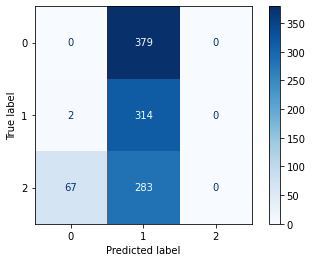

In [49]:
# Accuracy of using KNClassifier
cm = confusion_matrix(y_test.values, KNpredictions)
cm.ravel()
accuracy = accuracy_score(y_test, KNpredictions)
print('Accuracy: ',  accuracy)

Creport = classification_report(y_test, KNpredictions)
print(Creport)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNClassifier, X_test, y_test, cmap = 'Blues');